In [1]:
import pandas as pd
from pandas import Series,DataFrame

In [2]:
# Set up the Titanic csv file as a DataFrame
titanic_df = pd.read_csv('train.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#First some basic questions:

#1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)
#2.) What deck were the passengers on and how does that relate to their class?
#3.) Where did the passengers come from?
#4.) Who was alone and who was with family?

#Then we'll dig deeper, with a broader question:

#5.) What factors helped someone survive the sinking?

In [5]:
#1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

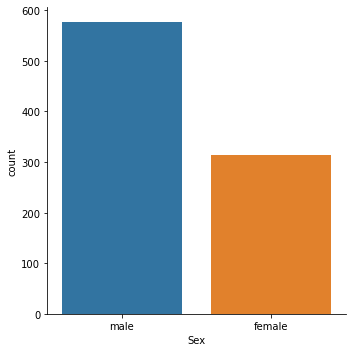

In [12]:
#check gender
sns.catplot(x='Sex',data=titanic_df,kind='count') 

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


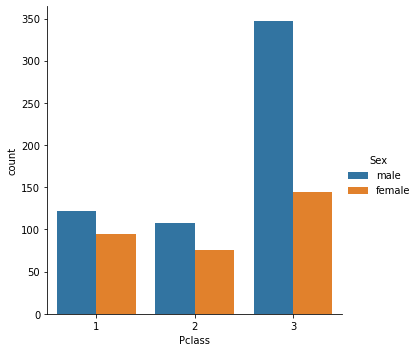

In [13]:
# Seperate the genders by classes
sns.catplot('Pclass',data=titanic_df,hue='Sex',kind='count')

In [15]:
# a function to sort through the sex 

def male_female_child(passenger):
    age,sex = passenger
    if age <16:
        return 'child'
    else:
        return sex

In [16]:
# We'll define a new column called 'person'
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [18]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


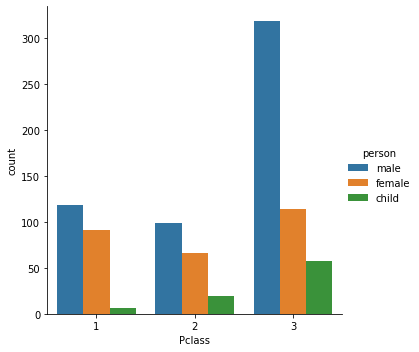

In [20]:
sns.catplot('Pclass',data=titanic_df,hue='person',kind='count')

<AxesSubplot:>

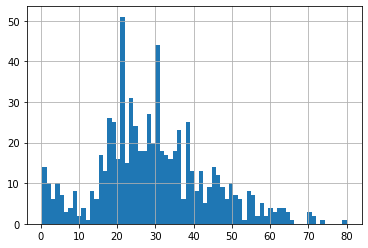

In [21]:
# Quick way to create a histogram using pandas
titanic_df['Age'].hist(bins=70)

In [23]:
#Find the mean
titanic_df['Age'].mean()

29.69911764705882

In [25]:
#couting number of male,female, children 
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

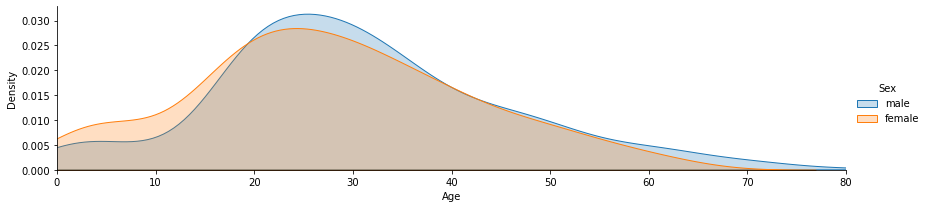

In [29]:
# Set the figure equal to a facetgrid with the pandas dataframe as its data source, set the hue, and change the aspect ratio.
fig = sns.FacetGrid(titanic_df, hue="Sex",aspect=4)
fig.map(sns.kdeplot, 'Age', shade = True)

# Set the x max limit by the oldest passenger
oldest = titanic_df['Age'].max()

#Since we know no one can be negative years old set the x lower limit at 0
fig.set(xlim=(0,oldest))

fig.add_legend()

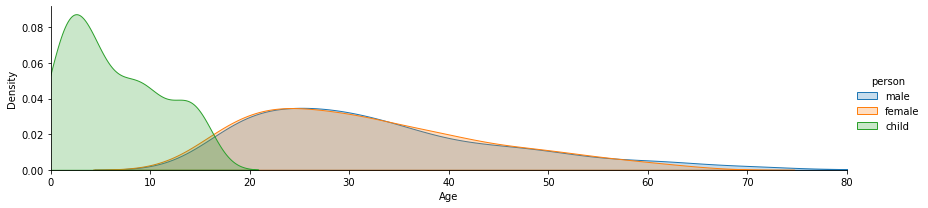

In [30]:
# Include children in graph 
fig = sns.FacetGrid(titanic_df, hue="person",aspect=4)
fig.map(sns.kdeplot, 'Age', shade = True)


oldest = titanic_df['Age'].max()


fig.set(xlim=(0,oldest))

fig.add_legend()

In [31]:
#2.) What deck were the passengers on and how does that relate to their class?


In [32]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [33]:
# First we'll drop the NaN values and create a new object, deck
deck = titanic_df['Cabin'].dropna()

In [34]:
# Quick preview of the decks
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

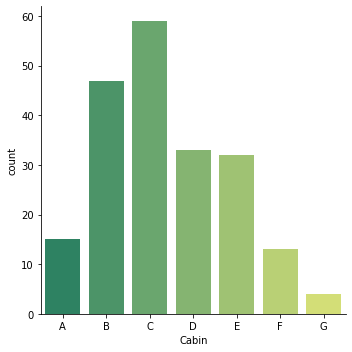

In [40]:
# So let's grab that letter for the deck level with a simple for loop

# Set empty list
levels = []

for level in deck:
    levels.append(level[0])
# Reset DataFrame and use factor plot

cabin_df = DataFrame(levels)

cabin_df.columns = ['Cabin']

sns.catplot(x='Cabin', data=cabin_df,kind='count',palette='summer',order=['A','B','C','D','E','F','G'])

In [42]:
#3.) Where did the passengers come from?


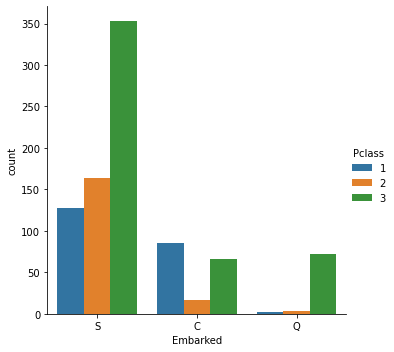

In [44]:
sns.catplot(x='Embarked', data=titanic_df,kind='count',hue ='Pclass')

In [45]:
#4.) Who was alone and who was with family?


In [46]:
# We'll add the parent/child column with the sibsp column
titanic_df['Alone'] =  titanic_df.Parch + titanic_df.SibSp
titanic_df['Alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [47]:
# Look for >0 or ==0 to set alone status
titanic_df['Alone'].loc[titanic_df['Alone']>0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone']==0] = 'Alone'

C:\Users\PC\AppData\Local\Temp\ipykernel_15428\2035257149.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df['Alone'].loc[titanic_df['Alone']>0] = 'With Family'


In [49]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


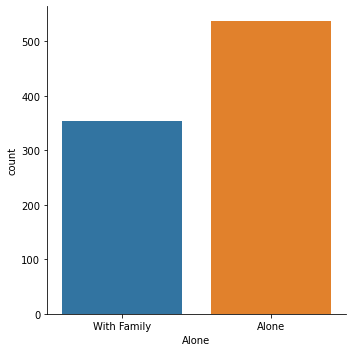

In [48]:
sns.catplot(x='Alone', data=titanic_df,kind='count')

In [50]:
#5.) What factors helped someone survive the sinking?


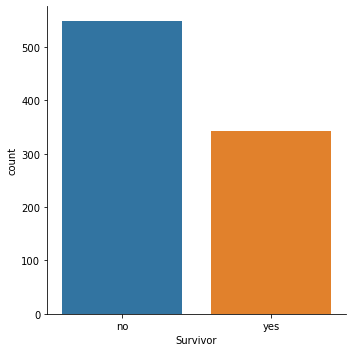

In [52]:
# Creating a new column for legibility purposes through mapping 
titanic_df["Survivor"] = titanic_df.Survived.map({0: "no", 1: "yes"})

sns.catplot(x='Survivor', data=titanic_df,kind='count')

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

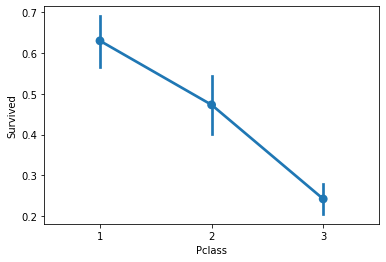

In [59]:
# Let see if class play a role in surviving 
sns.pointplot(x='Pclass',y='Survived',data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

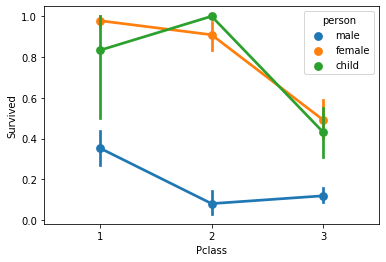

In [60]:
sns.pointplot(x='Pclass',y='Survived',hue='person',data=titanic_df)

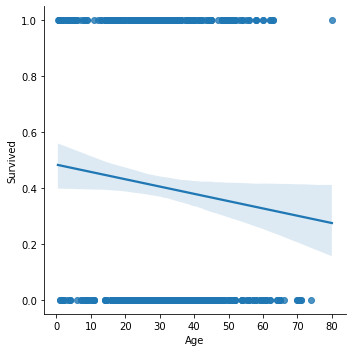

In [62]:
# Let see if ages play a role in surviving
sns.lmplot(x='Age',y='Survived',data=titanic_df)

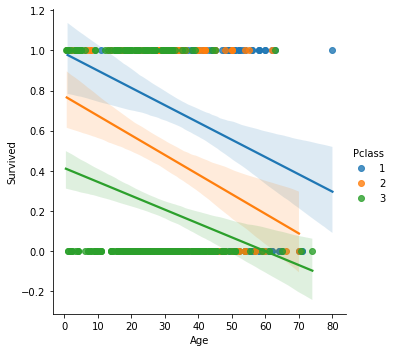

In [63]:
sns.lmplot(x='Age',y='Survived',hue='Pclass',data=titanic_df)

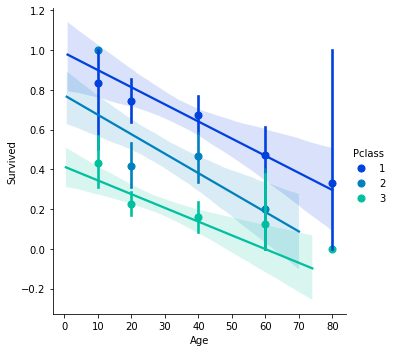

In [65]:
# Let's use a linear plot on age versus survival using hue for class seperation
generations=[10,20,40,60,80]
sns.lmplot(x='Age',y='Survived',hue='Pclass',data=titanic_df,palette='winter',x_bins=generations)

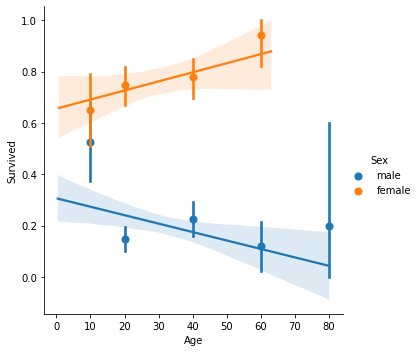

In [66]:
# Survived base on gender and age
sns.lmplot(x='Age',y='Survived',hue='Sex',data=titanic_df,x_bins=generations)

In [67]:
# Did having a family member increase the odds of surviving the crash?


<AxesSubplot:xlabel='Alone', ylabel='Survived'>

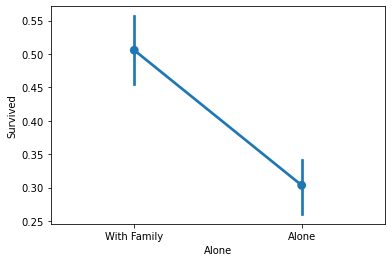

In [69]:
sns.pointplot(x='Alone',y='Survived',data=titanic_df)

In [70]:
# Did the deck have an effect on the passengers survival rate? Did this answer match up with your intuition?


In [73]:
#Create cabin letter
titanic_df['CabinLetter']= titanic_df['Cabin'].str[0]

In [97]:
#Drop NaN value
titanic_df['CabinLetter'].dropna(inplace=True)
titanic_df['Cabin'].dropna(inplace=True)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CabinLetter', ylabel='Survived'>

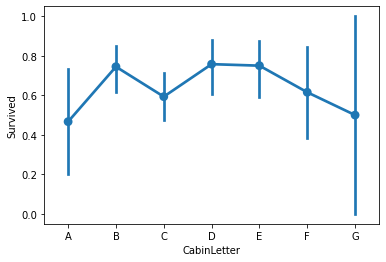

In [102]:
sns.pointplot('CabinLetter','Survived',data=titanic_df,order=['A','B','C','D','E','F','G'])